In [13]:
import numpy as np
import pandas as pd
import geopandas as gpd
from matplotlib import rc
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline

In [34]:
# Window 폰트 설정
font_location = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)

In [35]:
# Mac 폰트 설정
#rc('font', family='AppleGothic')
#plt.rcParams['axes.unicode_minus'] = False

## 지리 정보 Data Load

In [36]:
geo = gpd.read_file('../data/01_SKT/4개지역_행정동.shp')

#geo에서 필요한 정보만을 추출.
geo = geo[['HDONG_NM', 'SIDO_NM', 'SGNG_NM',
          'AREA', 'LENGTH', 'X_COORD', 'Y_COORD', 'geometry']]

## 클러스터링 Data Load

In [37]:
cluster_label = pd.read_csv('../data/label.csv', encoding = 'utf-8')
gu_dong= pd.read_csv('../data/gu_dong.csv')

In [38]:
# 클러스터링 결과
cluster_label = pd.merge(cluster_label, gu_dong, on = 'HDONG_NM')
#label의 값을 문자열로 변경
cluster_label = cluster_label.astype(str)
cluster_label.head()

,HDONG_NM,LABEL_1,LABEL_2,LABEL_3,LABEL_4,RULE,GU_NM
0,고산1동,2,2,2,1,2221,대구 수성구
1,고산2동,1,2,0,0,1200,대구 수성구
2,고산3동,1,2,0,1,1201,대구 수성구
3,공릉1동,0,1,0,1,101,서울 노원구
4,공릉2동,0,1,0,0,100,서울 노원구


## 각 시기별 DataFrame 생성

In [39]:
init = cluster_label[['GU_NM','HDONG_NM', 'LABEL_1']].rename({'LABEL_1':'LABEL'}, axis = 1)
spread = cluster_label[['GU_NM','HDONG_NM', 'LABEL_2']].rename({'LABEL_2':'LABEL'}, axis = 1)
decrease = cluster_label[['GU_NM','HDONG_NM', 'LABEL_3']].rename({'LABEL_3':'LABEL'}, axis = 1)
stag = cluster_label[['GU_NM','HDONG_NM', 'LABEL_4']].rename({'LABEL_4':'LABEL'}, axis = 1)

## 클러스터링 시각화

In [40]:
def visualize_clusters(period):
    period = geo.merge(period, on = 'HDONG_NM')
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    #서울 중구
    if period.query('GU_NM == "서울 중구"')['LABEL'].nunique() % 2 == 1:
        cmap = colors.ListedColormap(['#345387', '#7A87AF', '#C9CBDE'])
        period.query('GU_NM == "서울 중구"').plot(column='LABEL', cmap= cmap, legend=True, ax=ax[0,0])
        ax[0,0].set_title('서울 중구 군집화')
        ax[0,0].set_axis_off()
    else:
        cmap = colors.ListedColormap(['#345387', '#7A87AF'])
        period.query('GU_NM == "서울 중구"').plot(column='LABEL', cmap= cmap, legend=True, ax=ax[0,0])
        ax[0,0].set_title('서울 중구 군집화')
        ax[0,0].set_axis_off()
        
    #대구 중구
    if period.query('GU_NM == "대구 중구"')['LABEL'].nunique() % 2 == 1:
        cmap = colors.ListedColormap(['#345387', '#7A87AF', '#C9CBDE'])
        period.query('GU_NM == "대구 중구"').plot(column='LABEL', cmap= cmap, legend=True, ax=ax[1,0])
        ax[1,0].set_title('대구 중구 군집화')
        ax[1,0].set_axis_off()
    else:
        cmap = colors.ListedColormap(['#345387', '#7A87AF'])
        period.query('GU_NM == "대구 중구"').plot(column='LABEL', cmap= cmap, legend=True, ax=ax[1,0])
        ax[1,0].set_title('대구 중구 군집화')
        ax[1,0].set_axis_off()
        
    #서울 노원구    
    if period.query('GU_NM == "서울 노원구"')['LABEL'].nunique() % 2 == 1:
        cmap = colors.ListedColormap(['#345387', '#7A87AF', '#C9CBDE'])
        period.query('GU_NM == "서울 노원구"').plot(column='LABEL', cmap= cmap, legend=True, ax=ax[0,1])
        ax[0,1].set_title('서울 노원구 군집화')
        ax[0,1].set_axis_off()
    else:
        cmap = colors.ListedColormap(['#345387', '#7A87AF'])
        period.query('GU_NM == "서울 노원구"').plot(column='LABEL', cmap= cmap, legend=True, ax=ax[0,1])
        ax[0,1].set_title('서울 노원구 군집화')
        ax[0,1].set_axis_off()
        
    #대구 수성구    
    if period.query('GU_NM == "대구 수성구"')['LABEL'].nunique() % 2 == 1:
        cmap = colors.ListedColormap(['#345387', '#7A87AF', '#C9CBDE'])
        period.query('GU_NM == "대구 수성구"').plot(column='LABEL', cmap= cmap, legend=True, ax=ax[1,1])
        ax[1,1].set_title('서울 수성구 군집화')
        ax[1,1].set_axis_off()
    else:
        cmap = colors.ListedColormap(['#345387', '#7A87AF'])
        period.query('GU_NM == "대구 수성구"').plot(column='LABEL', cmap= cmap, legend=True, ax=ax[1,1])
        ax[1,1].set_title('대구 수성구 군집화')
        ax[1,1].set_axis_off()

## 초기단계 클러스터링 결과

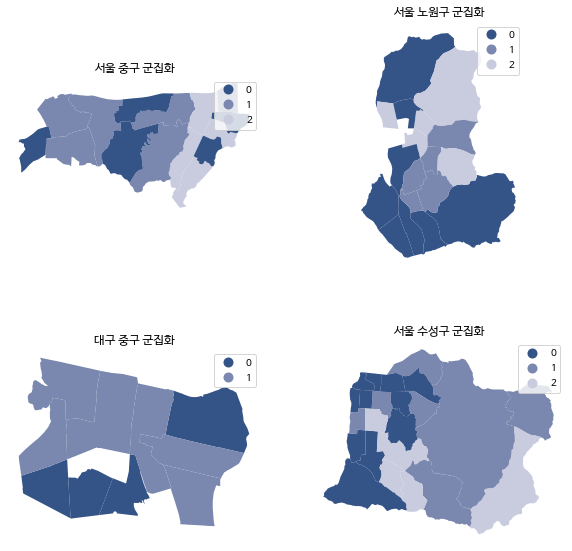

In [41]:
visualize_clusters(init)

## 확산단계 클러스터링 결과

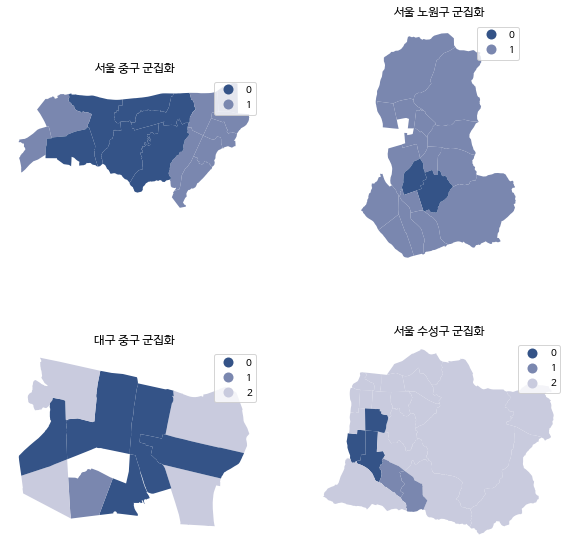

In [42]:
visualize_clusters(spread)

## 감소 단계 클러스터링 결과

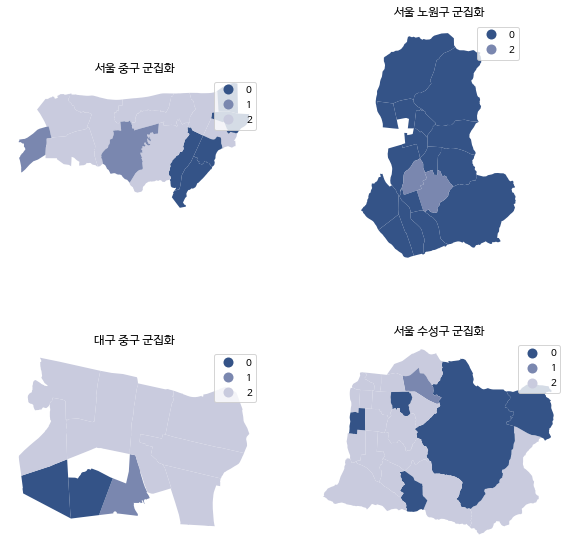

In [43]:
visualize_clusters(decrease)

## 정체 단계 클러스터링 결과

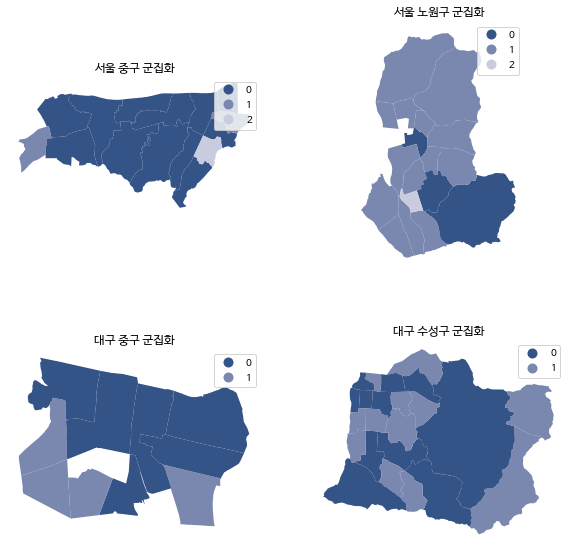

In [44]:
visualize_clusters(stag)